<a href="https://colab.research.google.com/github/nilijing/How_Wine_Qualities_Are_Influenced/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.formula.api as sm
import statsmodels
import sklearn.linear_model

import scipy,scipy.stats
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set()

In [ ]:
df = pd.read_csv("winequality-red.csv") 
df.head( )

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

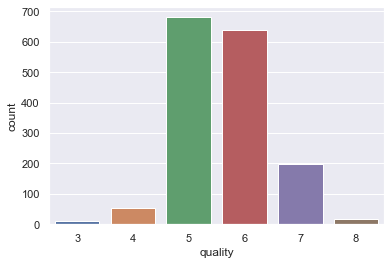

In [ ]:
sns.countplot(x='quality',data=df)

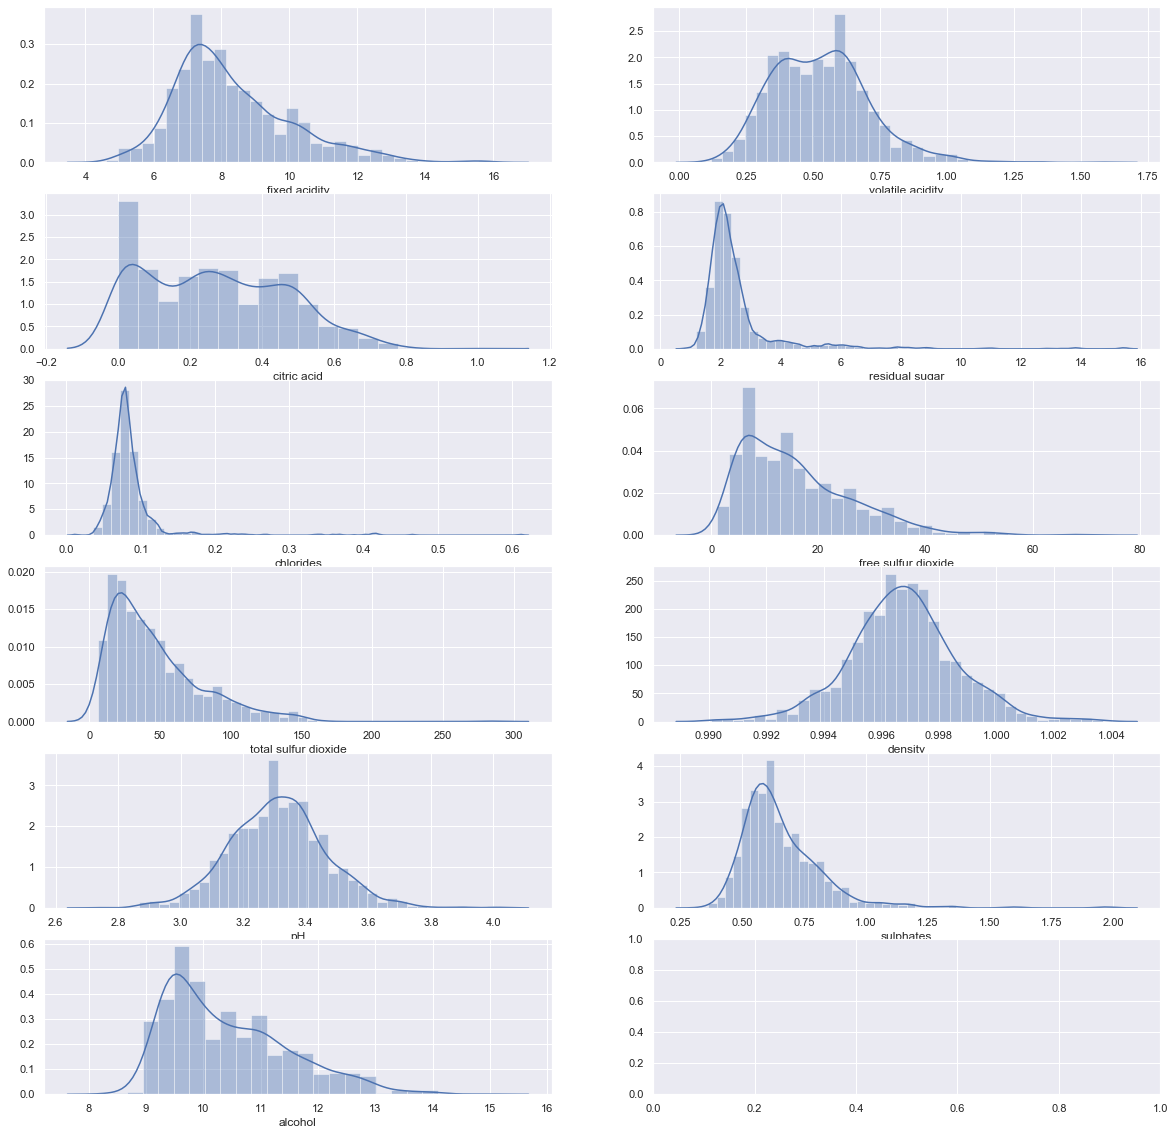

In [ ]:
f,ax = plt.subplots(6,2,figsize=(20,20))
sns.distplot(df["fixed acidity"],ax=ax[0,0])
sns.distplot(df["volatile acidity"],ax=ax[0,1])
sns.distplot(df["citric acid"],ax=ax[1,0])
sns.distplot(df["residual sugar"],ax=ax[1,1])
sns.distplot(df["chlorides"],ax=ax[2,0])
sns.distplot(df["free sulfur dioxide"],ax=ax[2,1])
sns.distplot(df["total sulfur dioxide"],ax=ax[3,0])
sns.distplot(df["density"],ax=ax[3,1])
sns.distplot(df["pH"],ax=ax[4,0])
sns.distplot(df["sulphates"],ax=ax[4,1])
sns.distplot(df["alcohol"],ax=ax[5,0])

[Text(0, 0.5, 'alcohol'), Text(0.5, 0, 'quality')]

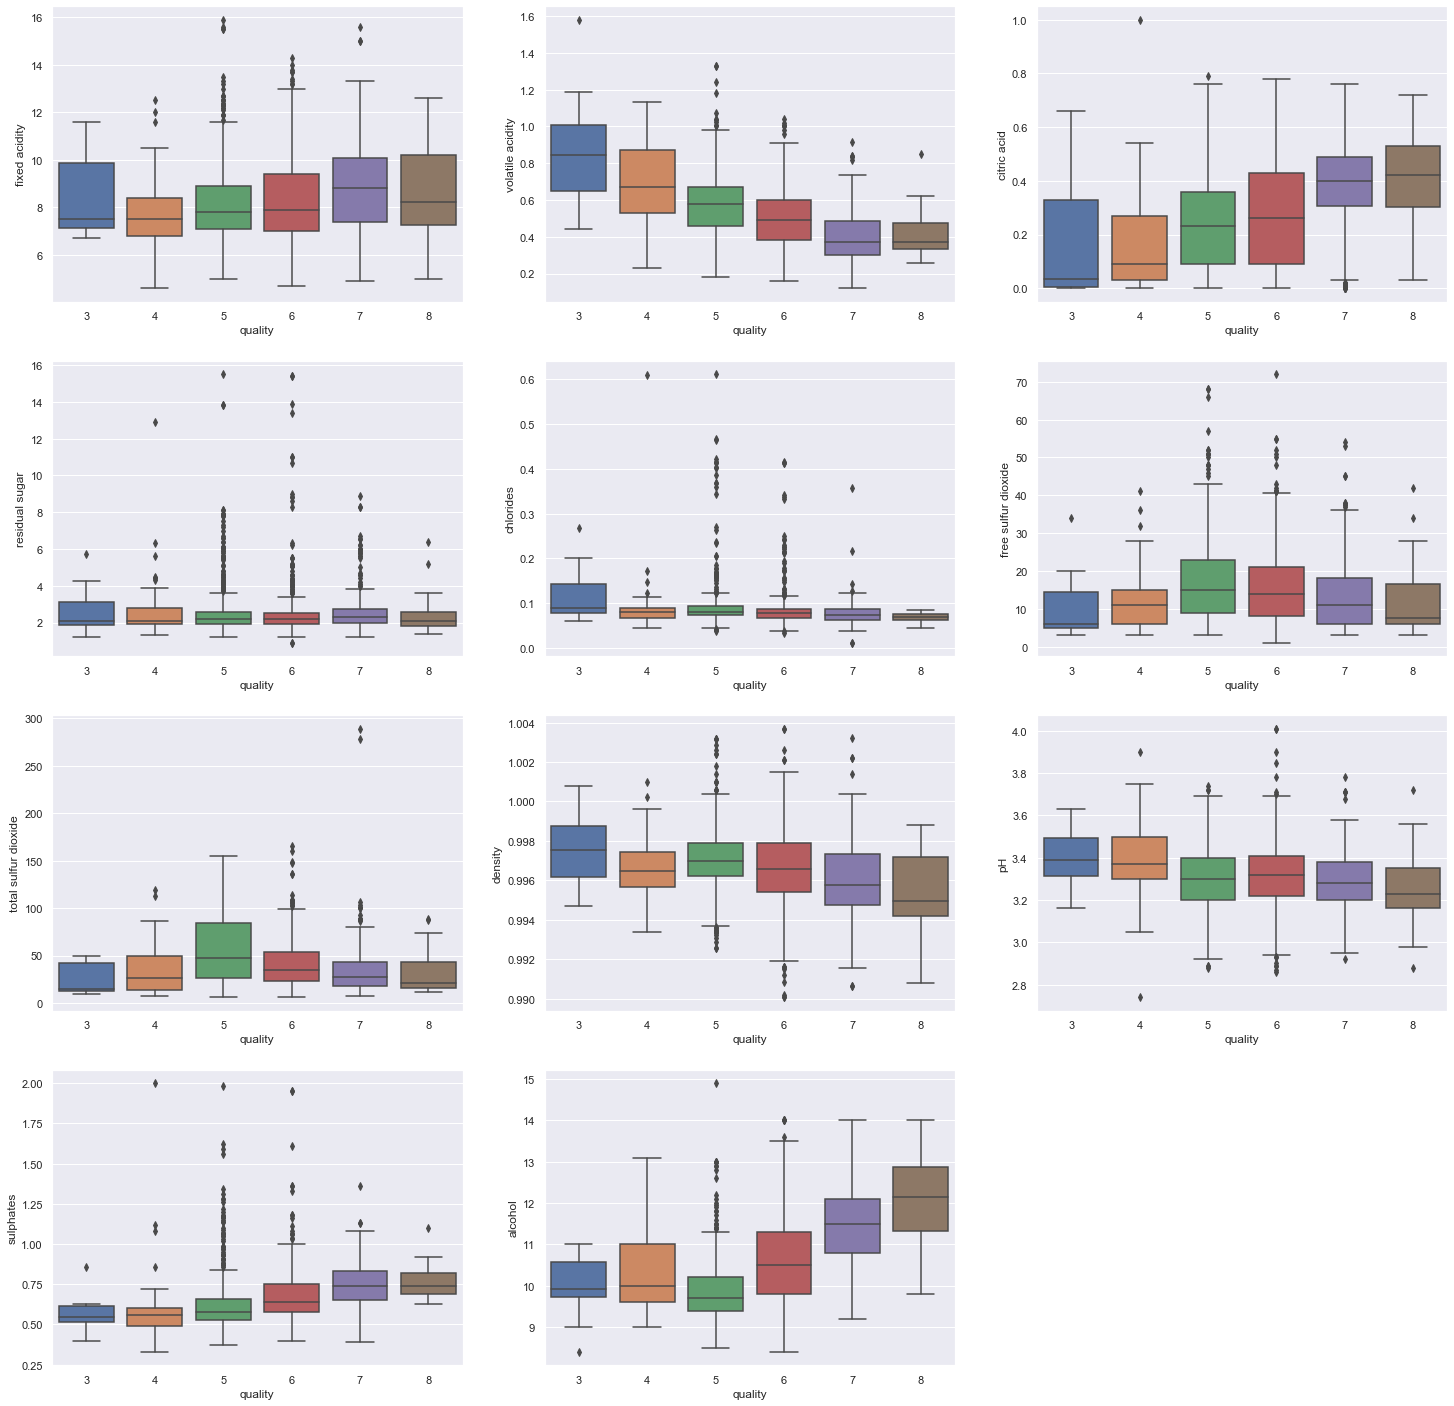

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(431)
sns.boxplot('quality','fixed acidity',data=df).set(xlabel='quality',ylabel='fixed acidity')

plt.subplot(432)
sns.boxplot('quality','volatile acidity',data=df).set(xlabel='quality',ylabel='volatile acidity')

plt.subplot(433)
sns.boxplot('quality','citric acid',data=df).set(xlabel='quality',ylabel='citric acid')

plt.subplot(434)
sns.boxplot('quality','residual sugar',data=df).set(xlabel='quality',ylabel='residual sugar')

plt.subplot(435)
sns.boxplot('quality','chlorides',data=df).set(xlabel='quality',ylabel='chlorides')

plt.subplot(436)
sns.boxplot('quality','free sulfur dioxide',data=df).set(xlabel='quality',ylabel='free sulfur dioxide')

plt.subplot(437)
sns.boxplot('quality','total sulfur dioxide',data=df).set(xlabel='quality',ylabel='total sulfur dioxide')

plt.subplot(438)
sns.boxplot('quality','density',data=df).set(xlabel='quality',ylabel='density')

plt.subplot(439)
sns.boxplot('quality','pH',data=df).set(xlabel='quality',ylabel='pH')

plt.subplot(4,3,10)
sns.boxplot('quality','sulphates',data=df).set(xlabel='quality',ylabel='sulphates')

plt.subplot(4,3,11)
sns.boxplot('quality','alcohol',data=df).set(xlabel='quality',ylabel='alcohol')

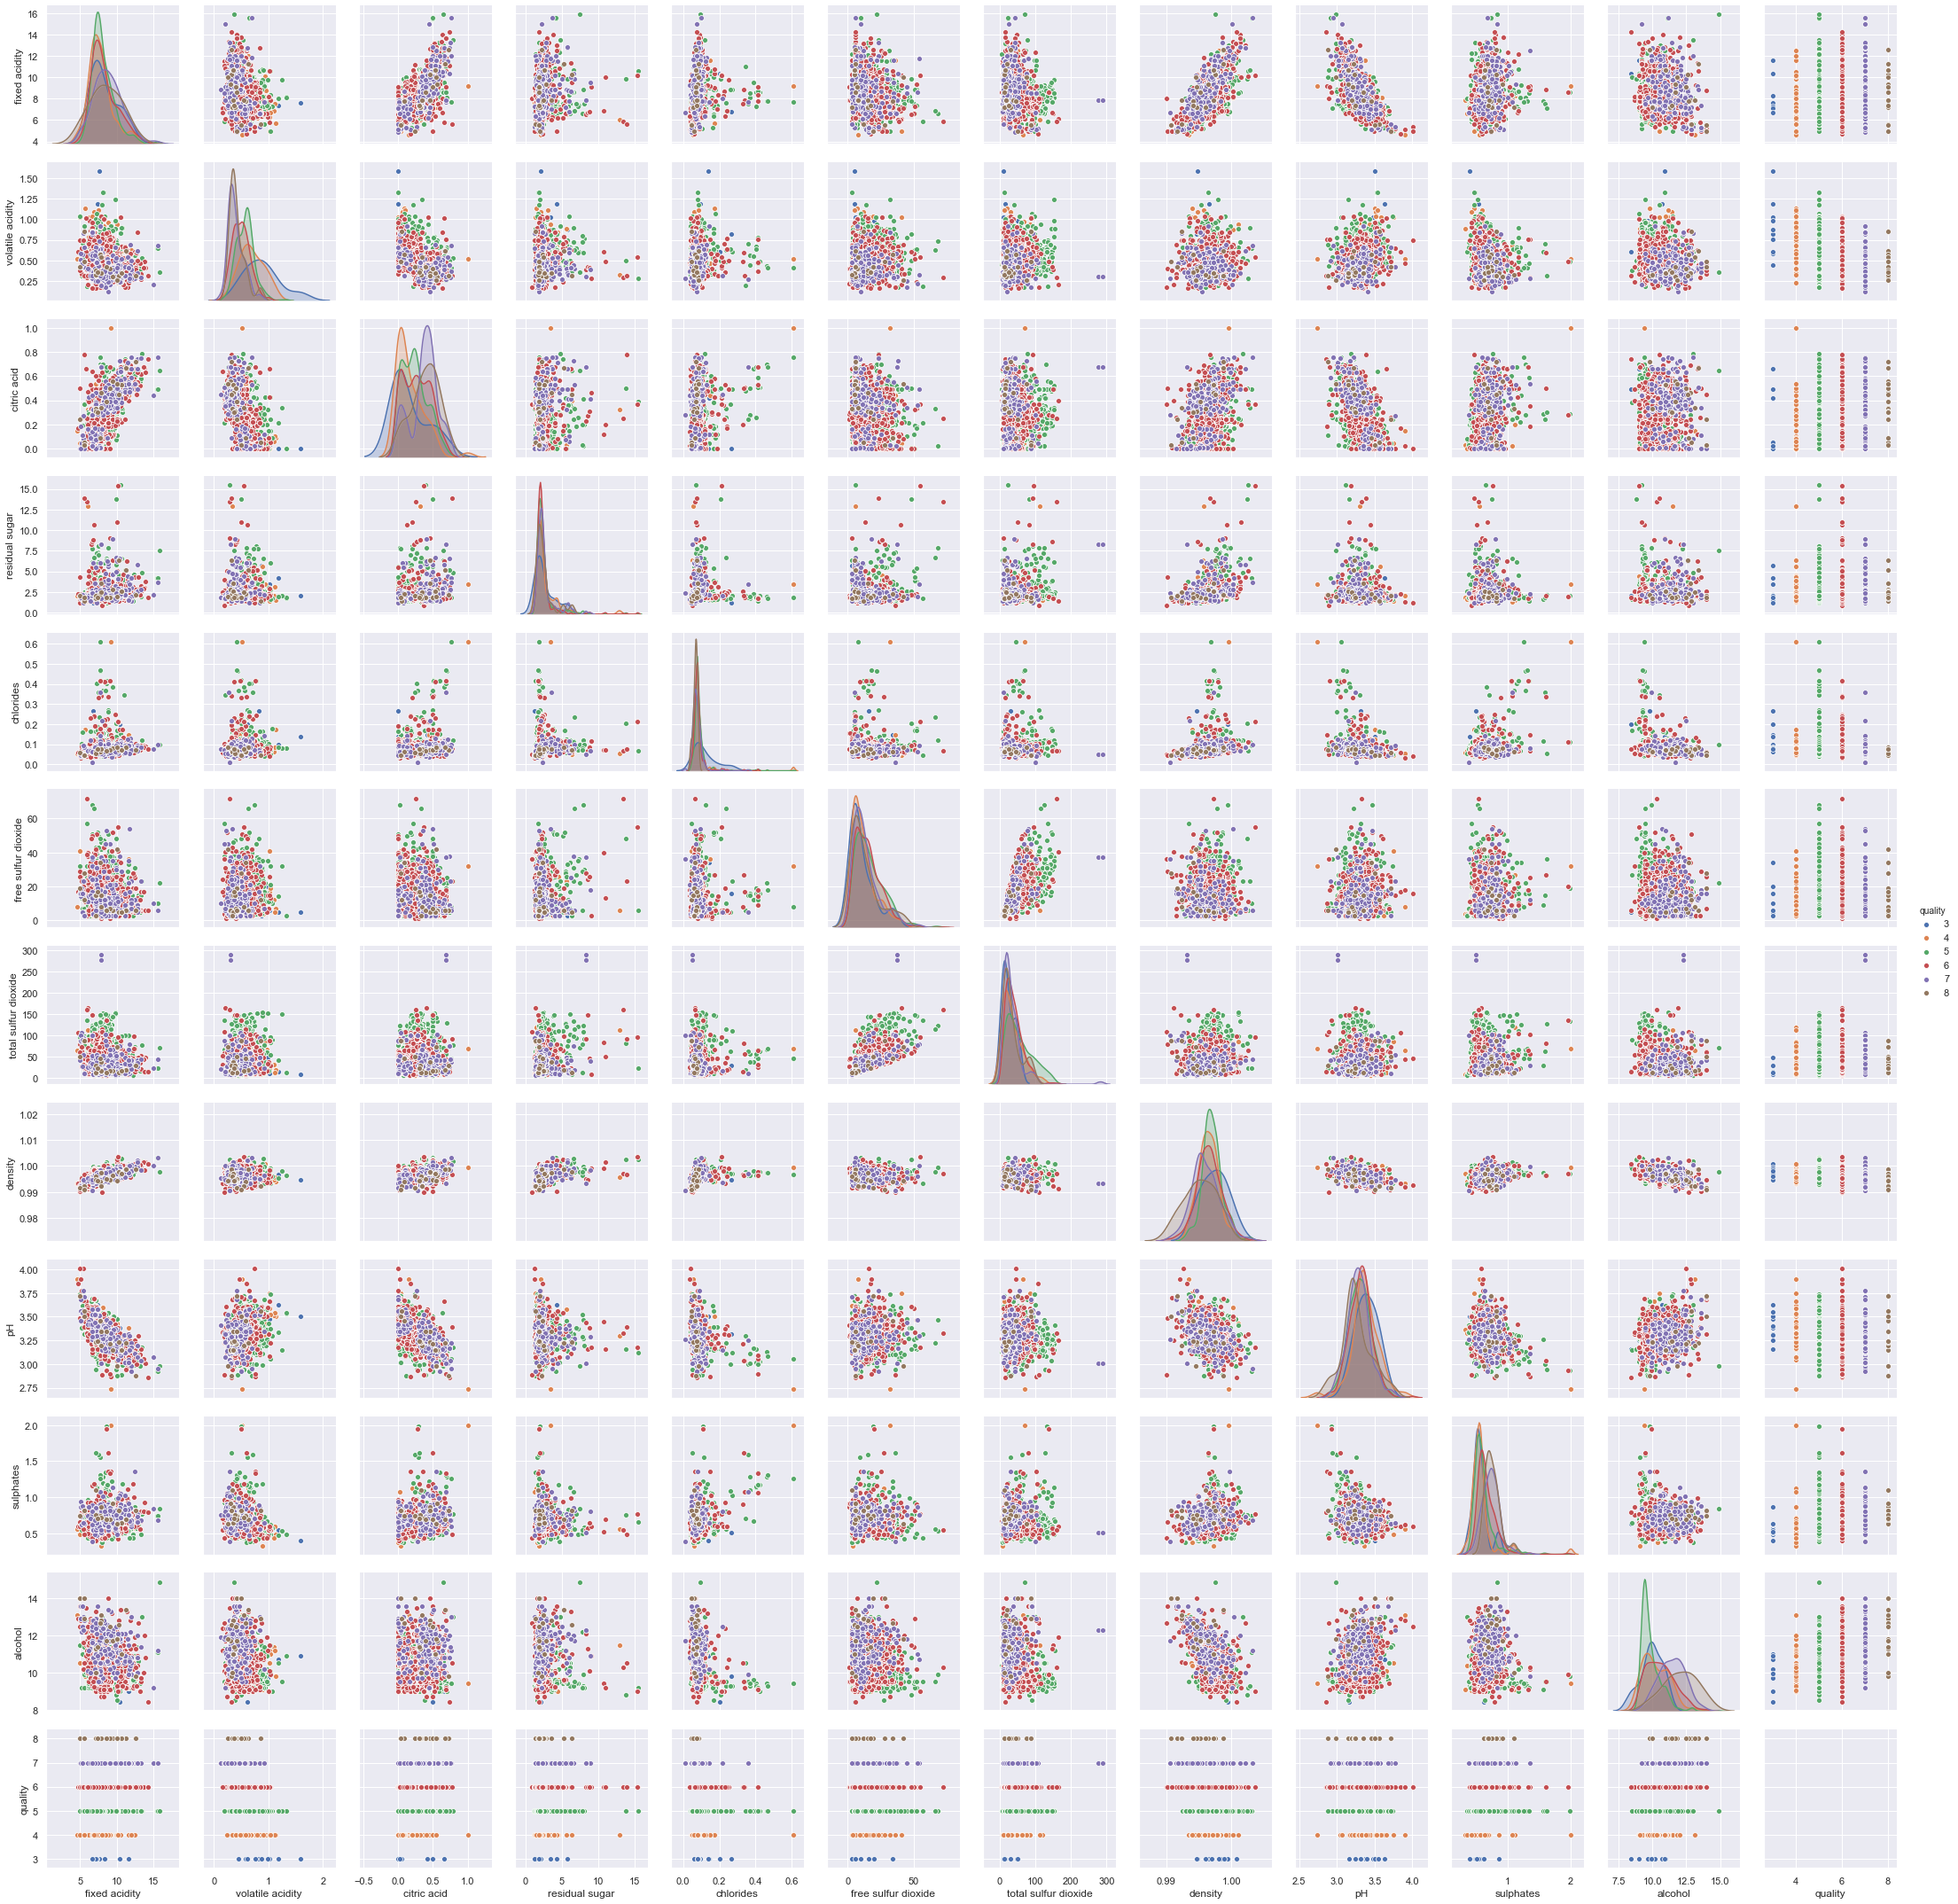

In [ ]:
sns.pairplot(df,diag_kind='kde',hue='quality')

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
cor_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'] 

In [ ]:
cor_colums_index = {i:name for i, name in enumerate(cor_columns)}

In [ ]:
cor_colums_index

{0: 'fixed acidity',
 1: 'volatile acidity',
 2: 'citric acid',
 3: 'residual sugar',
 4: 'chlorides',
 5: 'free sulfur dioxide',
 6: 'total sulfur dioxide',
 7: 'density',
 8: 'pH',
 9: 'sulphates',
 10: 'alcohol'}

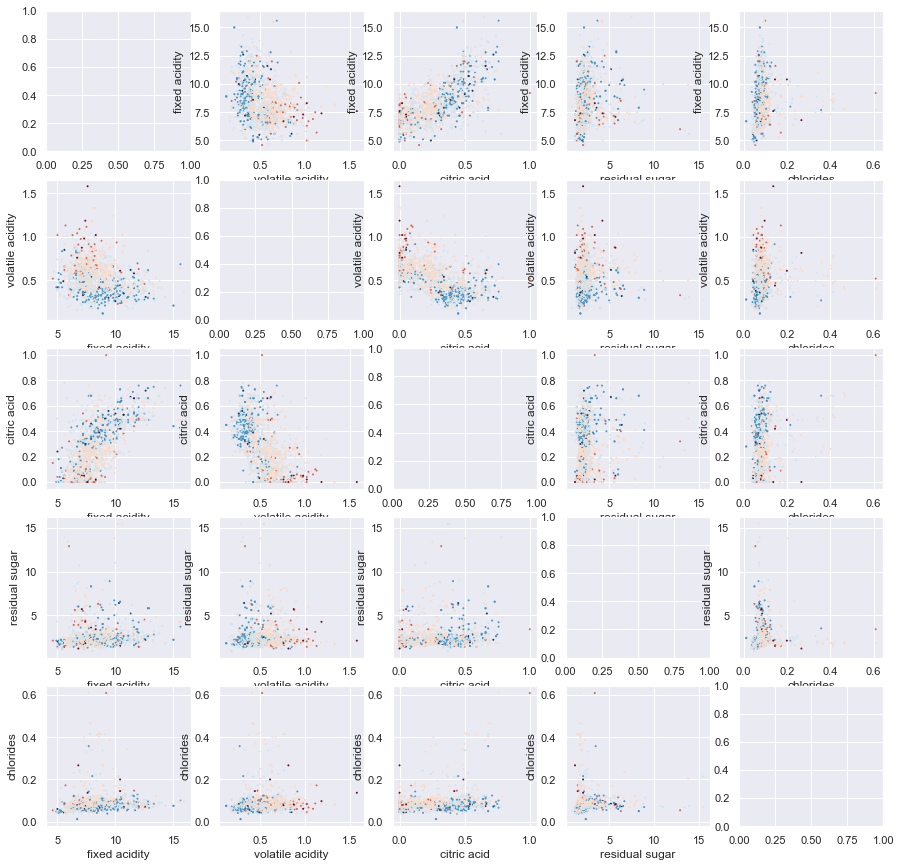

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))

for k in range(25):
    
    row = k // 5
    col = k % 5 
    #print(row, col)
    
    #row_index = row*4  
    #col_index =  
    var1 = cor_colums_index[row]
    var2 = cor_colums_index[col]

    if row == col:
        continue 
    
    ax = axes[col, row]
    ax.scatter(df[var1], df[var2], s=1, alpha=0.9, c=df['quality'], cmap="RdBu")
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    
    

In [ ]:
cor_colums_index

{0: 'fixed acidity',
 1: 'volatile acidity',
 2: 'citric acid',
 3: 'residual sugar',
 4: 'chlorides',
 5: 'free sulfur dioxide',
 6: 'total sulfur dioxide',
 7: 'density',
 8: 'pH',
 9: 'sulphates',
 10: 'alcohol'}

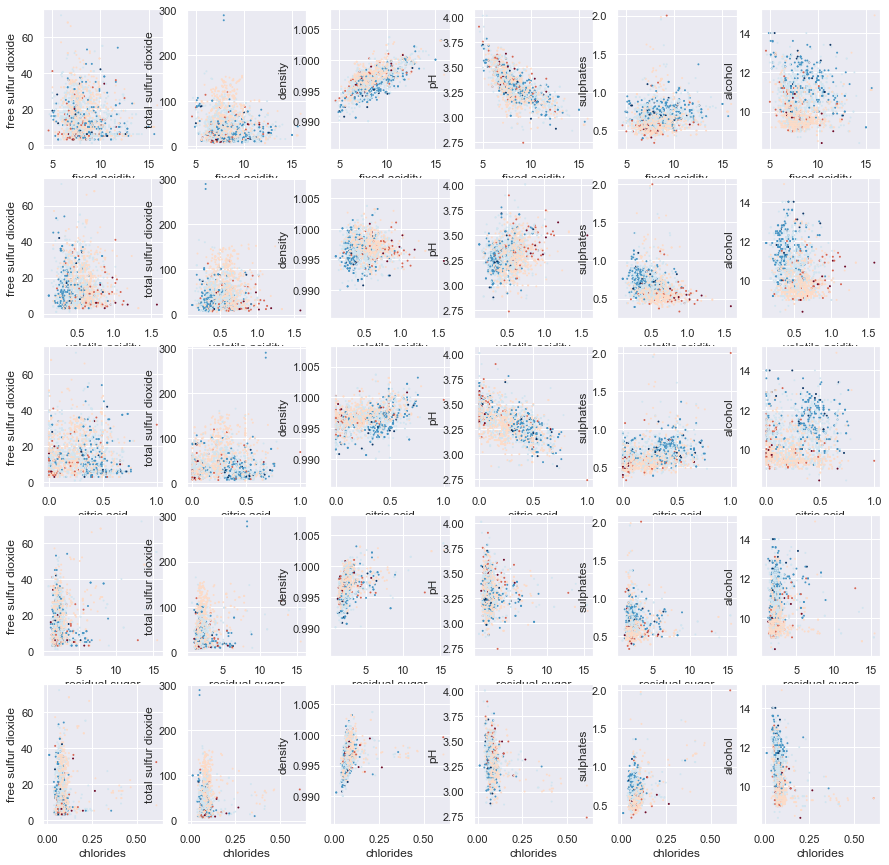

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15,15))

for k in range(30):
    
    row = k // 6
    col = k % 6 
    #print(row, col)
    
    row_index = row   
    col_index = col + 5 
    
    #print(row_index, col_index)
    
    var1 = cor_colums_index[row_index]
    var2 = cor_colums_index[col_index]
    
    #print(row_index, col_index)
    #print(var1, var2)
    
    ax = axes[row, col]
    ax.scatter(df[var1], df[var2], s=1, alpha=0.9, c=df['quality'], cmap="RdBu")
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

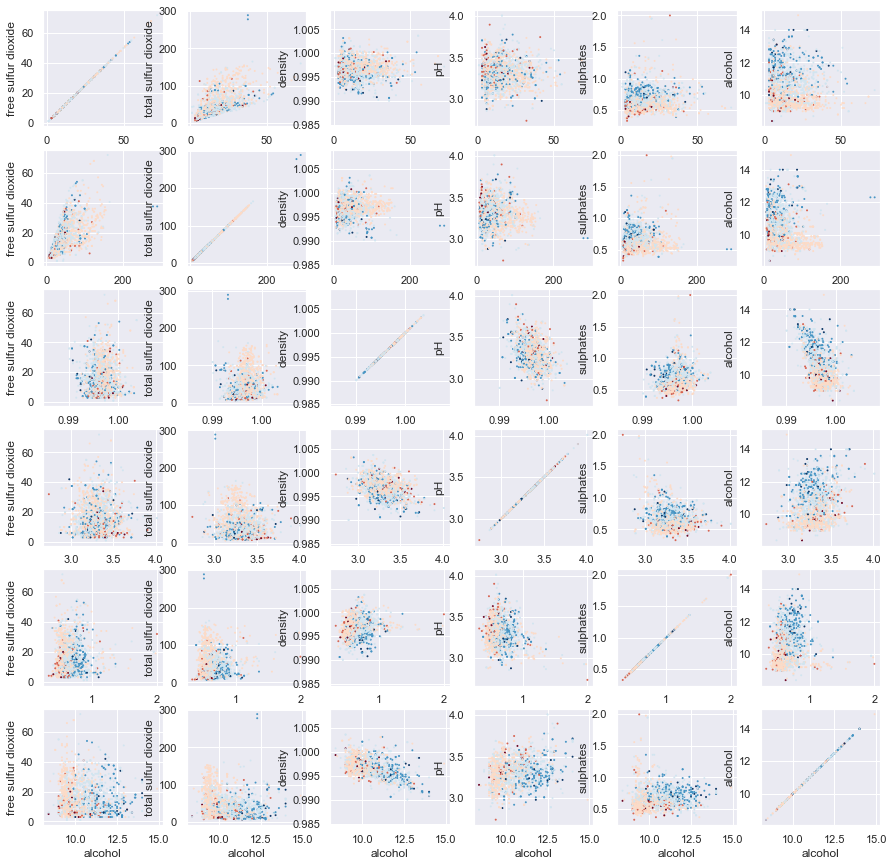

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15))

for k in range(36):
    
    row = k // 6
    col = k % 6 
    #print(row, col)
    
    row_index = row + 5  
    col_index = col + 5 
    
    #print(row_index, col_index)
    
    var1 = cor_colums_index[row_index]
    var2 = cor_colums_index[col_index]
    
    #print(row_index, col_index)
    #print(var1, var2)
    
    ax = axes[row, col]
    ax.scatter(df[var1], df[var2], s=1, alpha=0.9, c=df['quality'], cmap="RdBu")
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

In [ ]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


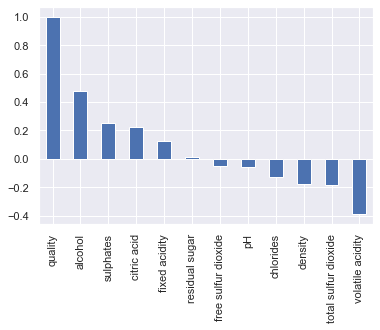

In [ ]:
correlations.plot(kind='bar')

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
cor_matrix = df[cor_columns].corr()

In [ ]:
corr = pd.melt(cor_matrix.reset_index(), id_vars='index')

In [ ]:
corr.head()

index       variable     value
0     fixed acidity  fixed acidity  1.000000
1  volatile acidity  fixed acidity -0.256131
2       citric acid  fixed acidity  0.671703
3    residual sugar  fixed acidity  0.114777
4         chlorides  fixed acidity  0.093705

In [ ]:
corr.columns = ['x', 'y', 'value']

In [ ]:
corr = corr[corr['x'] != corr['y']]

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

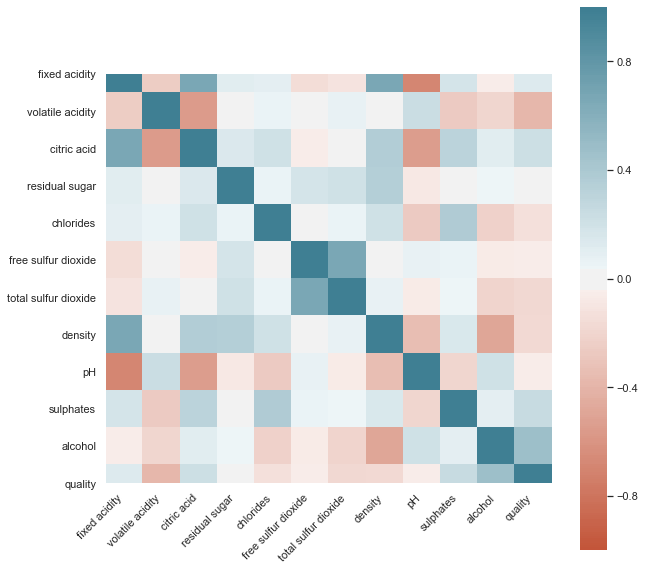

In [ ]:
%matplotlib inline
data = pd.read_csv('winequality-red.csv')

corr = data.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


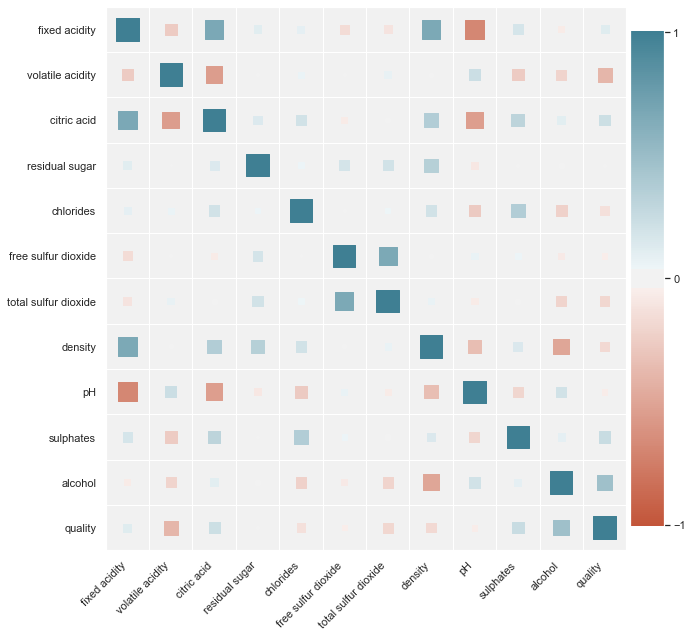

In [ ]:
plt.figure(figsize=(10, 10))
corrplot(corr)

In [ ]:
df.shape

(1599, 12)

# Partition into train and test

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df,test_size=0.25,random_state=42)

In [ ]:
cor_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
x_tr=np.array(train_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
 'total sulfur dioxide', 'density','pH','sulphates','alcohol']].astype(float))
y_tr=np.array(train_set[['quality']].astype(int))

x_te=np.array(test_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
 'total sulfur dioxide', 'density','pH','sulphates','alcohol']].astype(float))
y_te=np.array(test_set[['quality']].astype(int))


# Dimensionality Reduction Using PCA

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

scaler=StandardScaler()
x_tr=scaler.fit_transform(x_tr)
x_te=scaler.fit_transform(x_te)
print(x_tr)
print(x_te)

[[ 1.97418149 -0.23260309  1.11458849 ... -0.78641859 -1.3131938
  -1.15257747]
 [ 0.28189382  0.37802632  0.09088663 ...  0.3161036  -0.97064635
  -1.24703683]
 [-0.71013687  0.32251456 -1.39348108 ...  0.70522908 -0.62809889
   1.01998773]
 ...
 [-0.65178213  0.48904985 -1.08637052 ...  1.28891729 -0.68519014
  -0.8691994 ]
 [-0.2432989  -1.84244427  0.39799719 ...  0.05668661  0.79918216
   1.39782516]
 [-1.46874859 -1.34283839 -0.06266865 ...  0.51066634 -0.68519014
   2.90917487]]
[[-0.34515185  0.25381745 -0.97086479 ... -0.45663065  0.04935995
  -0.76620052]
 [-0.29016948 -0.08908257 -0.50404053 ...  0.51251824 -1.14322934
  -0.85836116]
 [ 1.30431937  0.88246748 -0.24469372 ... -0.19819095  2.16951867
  -0.4897186 ]
 ...
 [-0.6750461   0.48241746 -1.38581969 ...  1.02939765  0.31437979
  -0.4897186 ]
 [-0.29016948  0.59671747 -1.12647288 ... -0.13358102 -0.14940494
  -1.04268244]
 [ 1.249337   -0.8891826   1.57073396 ... -1.10272991  0.44688971
   0.61620908]]


In [ ]:
x_tr.shape

(1199, 11)

In [ ]:
x_te.shape

(400, 11)

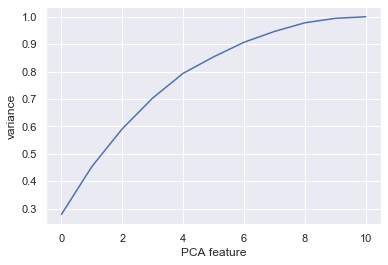

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

pipeline=make_pipeline(scaler,pca)
pipeline.fit(x_tr)
pipeline.fit(x_te)

pca_tr=PCA().fit(x_tr)
plt.plot(np.cumsum(pca_tr.explained_variance_ratio_))
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks()
plt.show()

In [ ]:
pca=PCA(n_components=7)
pca.fit(x_tr)
pca_x=pca.transform(x_tr)
print(pca_x.shape)

(1199, 7)


In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [ ]:
scaled_data = StandardScaler().fit(df[cor_columns]).transform(df[cor_columns])

In [ ]:
pca=PCA(n_components=10)
pca.fit(df[cor_columns])
pca_x=pca.transform(df[cor_columns])

In [ ]:
pca_x.shape

(1599, 10)

In [ ]:
df['quality'].unique().shape

(6,)

# Kmeans

In [ ]:
df_clustering = scaler.fit_transform(df[cor_columns])

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=6, random_state=10)
#clusters = k_means.fit_predict(scaled_data)
clusters = k_means.fit_predict(df_clustering)

In [ ]:
clusters

array([1, 1, 1, ..., 5, 1, 5])

In [ ]:
df.shape

(1599, 12)

In [ ]:
df['kmeans_cluster_label'] = clusters

In [ ]:
df.kmeans_cluster_label.value_counts()

1    527
3    364
2    331
5    303
0     46
4     28
Name: kmeans_cluster_label, dtype: int64

In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
from scipy.stats import mode

In [ ]:
labels = np.zeros_like(clusters)
for i in range(6):
    mask = (clusters == i)
    labels[mask] = mode(df.quality[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(df.quality, labels)

0.549718574108818

In [ ]:
from sklearn.metrics import confusion_matrix

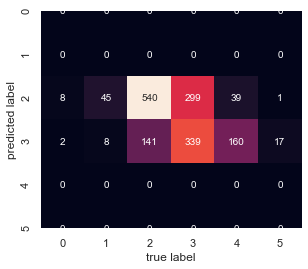

In [ ]:
mat = confusion_matrix(df.quality, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
pd.crosstab(df.quality, labels)

col_0      5    6
quality          
3          8    2
4         45    8
5        540  141
6        299  339
7         39  160
8          1   17

In [ ]:
pd.crosstab(df.quality, df.kmeans_cluster_label)

kmeans_cluster_label   0    1    2    3   4    5
quality                                         
3                      0    7    1    2   0    0
4                      1   36    7    4   1    4
5                     28  281  214   96  17   45
6                     12  181   97  177   9  162
7                      5   22   11   78   1   82
8                      0    0    1    7   0   10

# Spectral

In [ ]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
clusters2 = SpectralClustering(n_clusters=6, 
                               affinity="nearest_neighbors", 
                               n_neighbors=30).fit_predict(df_clustering)

In [ ]:
df['spectral_clusters1'] = clusters2 

df.spectral_clusters1.value_counts()

5    536
0    396
2    272
1    206
4    162
3     27
Name: spectral_clusters1, dtype: int64

In [ ]:
pd.crosstab(df.quality, df.spectral_clusters1)

spectral_clusters1    0   1    2   3   4    5
quality                                      
3                     1   2    0   0   0    7
4                     8   4    2   1   5   33
5                   253  65   28  17  33  285
6                   119  87  138   8  98  188
7                    15  44   94   1  22   23
8                     0   4   10   0   4    0

In [ ]:
labels2 = np.zeros_like(clusters2)
for i in range(6):
    mask = (clusters2 == i)
    labels2[mask] = mode(df.quality[mask])[0]

In [ ]:
pd.crosstab(df.quality, labels2)

col_0      5    6
quality          
3          8    2
4         42   11
5        555  126
6        315  323
7         39  160
8          0   18

In [ ]:
accuracy_score(df.quality, labels2)

0.5490931832395247

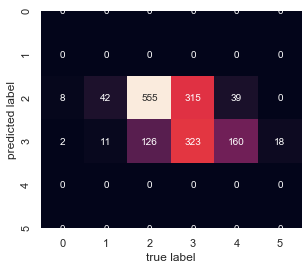

In [ ]:
mat = confusion_matrix(df.quality, labels2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Agglomerative

In [ ]:
clusters3 = AgglomerativeClustering(n_clusters=6).fit_predict(df_clustering)

In [ ]:
clusters3

array([1, 1, 1, ..., 0, 0, 2], dtype=int64)

In [ ]:
df['agglomerative_clusters'] = clusters3

In [ ]:
pd.crosstab(df.quality, df['agglomerative_clusters'])

agglomerative_clusters    0    1    2   3   4   5
quality                                          
3                         1    7    0   1   0   1
4                         8   34    5   1   4   1
5                       270  278   56  17  25  35
6                       177  191  152  13  49  56
7                        28   20  102   1  18  30
8                         1    0   12   0   3   2

In [ ]:
labels3 = np.zeros_like(clusters3)
for i in range(6):
    mask = (clusters3 == i)
    labels3[mask] = mode(df.quality[mask])[0]

In [ ]:
pd.crosstab(df.quality, labels3)

col_0      5    6
quality          
3          9    1
4         43   10
5        565  116
6        381  257
7         49  150
8          1   17

In [ ]:
accuracy_score(df.quality, labels3)

0.5140712945590994

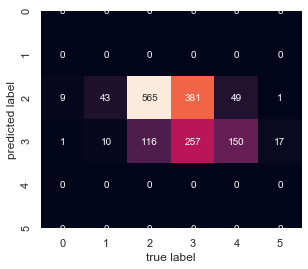

In [ ]:
mat = confusion_matrix(df.quality, labels3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Visualize Agglometrative Clustering

In [ ]:
import chart_studio
chart_studio.tools.set_credentials_file(username='jc2579', api_key='Oc2jSYiodbFJpRbH2mgj')

In [ ]:
import chart_studio.plotly as py
import numpy as np
from chart_studio.plotly import iplot
from plotly.tools import FigureFactory as ff
from plotly.figure_factory import create_dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
 'total sulfur dioxide', 'density','pH','sulphates','alcohol']
X = np.random.rand(11, 7)
dendro = create_dendrogram(X,labels=names)
dendro['layout'].update({'width':1400, 'height':600, 'title': 'AgglomerativeClustering', 
                    'xaxis': {'title': 'xaxis label'}, 'yaxis': {'title': 'yaxis label'}})
dendro.show()

# Optics

In [ ]:
pca_x.shape[1]

10

In [ ]:
#default 
min_samples=19

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

mean 1.178068862168385
std 0.6926993535603146


(array([2338., 3524.,  407.,   93.,   14.,   11.,    9.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

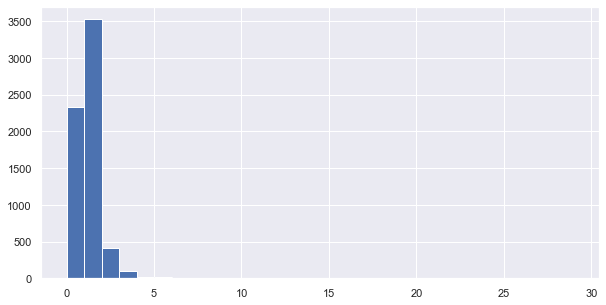

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(df_clustering)

distances, indices = nbrs.kneighbors(df_clustering)



distances2 = [] 
for d in distances:
    distances2.extend(d[1:])
distances2 = np.array(sorted(distances2))

print("mean", np.mean(distances2)) 


print("std", np.std(distances2))

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(distances2, bins=np.arange(0,30,1) )

In [ ]:
len(distances2)

6396

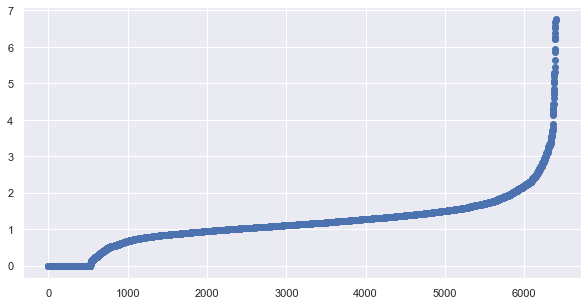

In [ ]:
tmp = np.arange(len(distances2))

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(tmp, distances2)

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
clusters4 = OPTICS(min_samples=5, max_eps=2).fit_predict(df_clustering)

df['optics_clusters'] = clusters4

print("number of clusters", df.optics_clusters.unique().shape[0])
df.optics_clusters.value_counts()

number of clusters 35


-1     1362
 25      15
 31      12
 3       10
 29      10
 27       9
 17       9
 1        8
 32       8
 5        8
 33       8
 2        7
 16       7
 26       7
 0        7
 23       6
 22       6
 21       6
 20       6
 24       6
 7        6
 4        6
 14       6
 12       6
 11       6
 6        6
 8        6
 28       5
 9        5
 10       5
 15       5
 18       5
 19       5
 30       5
 13       5
Name: optics_clusters, dtype: int64

In [ ]:
clusters4

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
df['optics_clusters'] = clusters4

In [ ]:
pd.crosstab(df.quality, df['optics_clusters'])

optics_clusters  -1    0    1    2    3    4    5    6    7    8   ...   24  \
quality                                                            ...        
3                 10    0    0    0    0    0    0    0    0    0  ...    0   
4                 49    0    0    0    0    0    0    0    1    0  ...    0   
5                577    7    5    3    1    1    1    6    2    2  ...    0   
6                545    0    3    4    6    5    7    0    3    4  ...    2   
7                165    0    0    0    3    0    0    0    0    0  ...    4   
8                 16    0    0    0    0    0    0    0    0    0  ...    0   

optics_clusters   25   26   27   28   29   30   31   32   33  
quality                                                       
3                  0    0    0    0    0    0    0    0    0  
4                  0    0    0    0    1    0    0    0    0  
5                 10    2    5    5    0    2    0    8    6  
6                  5    5    4    0    2    3    3    0    2  
7                  0    0    0    0    7    0    7    0    0  
8                  0    0    0    0    0    0    2    0    0  

[6 rows x 35 columns]

In [ ]:
labels4 = np.zeros_like(clusters4)
for i in range(6):
    mask = (clusters4 == i)
    labels4[mask] = mode(df.quality[mask])[0]

In [ ]:
accuracy_score(df.quality, labels4)

0.021263289555972485

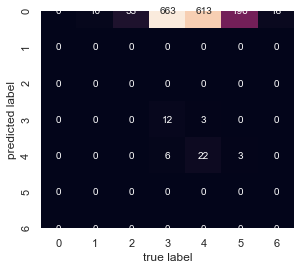

In [ ]:
mat = confusion_matrix(df.quality, labels4)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Logistic regression-benchmark

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
lr_predict = lr.predict(x_te)

In [ ]:
lr_conf_matrix = confusion_matrix(y_te, lr_predict)
lr_acc_score = accuracy_score(y_te, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  0   0   1   0   0   0]
 [  0   0  10   3   0   0]
 [  0   0 130  34   0   0]
 [  0   0  70  96   3   0]
 [  0   0   3  42   3   0]
 [  0   0   0   1   4   0]]
57.25


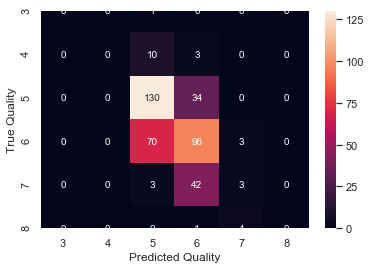

In [ ]:
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_te,lr_predict)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,solver='lbfgs',
                      multi_class='multinomial').fit(x_tr,y_tr)

In [ ]:
clf.score(x_te,y_te)

0.57

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_tr, y_tr)
rf_predict=rf.predict(x_te)

In [ ]:
rf_conf_matrix = confusion_matrix(y_te, rf_predict)
rf_acc_score = accuracy_score(y_te, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  0   0   1   0   0   0]
 [  0   0   8   4   1   0]
 [  0   0 123  38   3   0]
 [  0   1  56  98  14   0]
 [  0   0   1  22  24   1]
 [  0   0   0   3   2   0]]
61.25000000000001


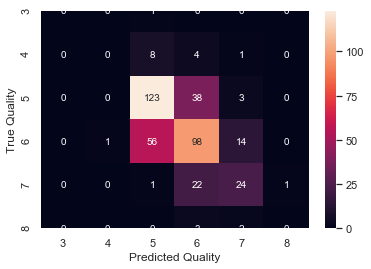

In [ ]:
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_te,rf_predict)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RF=RandomForestClassifier(random_state=123)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[4,5,10,20,50]}]

grid_search_RF=GridSearchCV(RF,param_grid,cv=5)
grid_search_RF.fit(x_tr,y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=123,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [ ]:
grid_search_RF.best_params_

{'n_estimators': 50}

In [ ]:
curves_RF=grid_search_RF.cv_results_

for mean_score,params in zip(curves_RF["mean_test_score"],curves_RF["params"]):
    print(mean_score,params)

0.5921601334445371 {'n_estimators': 4}
0.6071726438698916 {'n_estimators': 5}
0.6338615512927439 {'n_estimators': 10}
0.6572143452877398 {'n_estimators': 20}
0.6672226855713094 {'n_estimators': 50}


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_tr,y_tr)
dt_predict = dt.predict(x_te)

In [ ]:
dt_conf_matrix = confusion_matrix(y_te, dt_predict)
dt_acc_score = accuracy_score(y_te, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  0   0   1   0   0   0]
 [  0   2   6   5   0   0]
 [  0   2 119  34   8   1]
 [  0   6  57  83  21   2]
 [  0   1   3  16  26   2]
 [  0   0   1   1   3   0]]
57.49999999999999


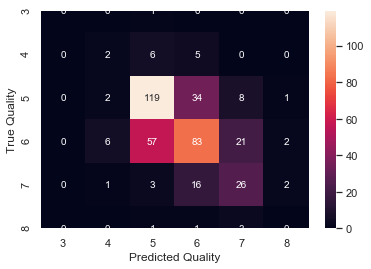

In [ ]:
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_te,dt_predict)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

DT=DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_DT=GridSearchCV(DT,param_grid,cv=6)

In [ ]:
param = {'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]}
grid = GridSearchCV(DT,param_grid=param,cv=6)
grid.fit(x_tr,y_tr)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [30, 50, 60, 100],
                         'min_impurity_decrease': [0.1, 

In [ ]:
print(grid.best_params_, grid.best_score_) 

{'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} 0.43119266055045874


In [ ]:
clf = DecisionTreeClassifier(max_depth=30,min_samples_leaf=2,min_impurity_decrease=0.1)
clf.fit(x_tr,y_tr)
y_pred = clf.predict(x_te)
print(clf.score(x_tr,y_tr),clf.score(x_te,y_te))

0.43119266055045874 0.41


# Visualize Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pandas as pd
wine = pd.read_csv("winequality-red.csv")
x = wine.drop('quality',axis=1)
y = wine['quality']

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 42)
clfTre = tree.DecisionTreeClassifier(max_depth=5)
clfTre.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

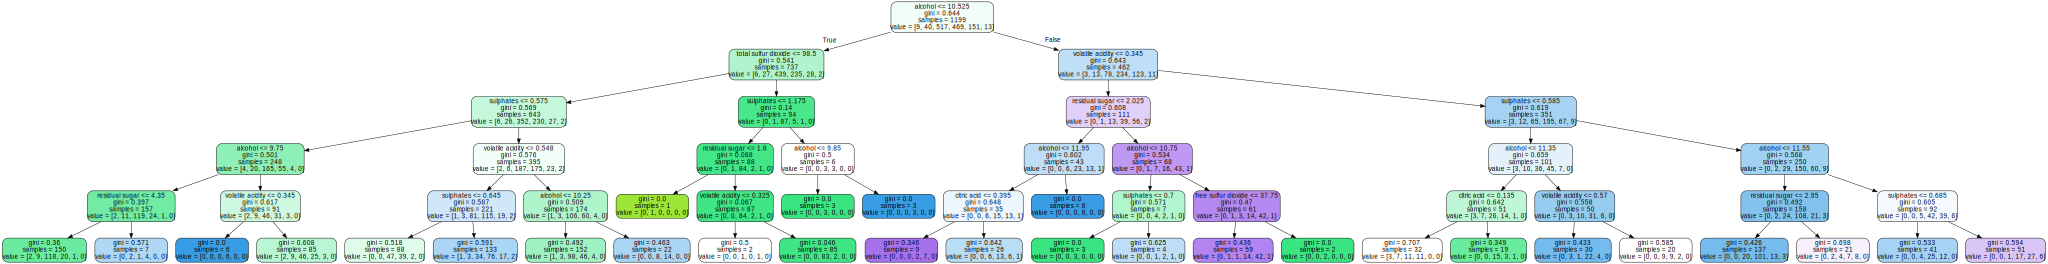

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clfTre, out_file=None, max_depth=5, feature_names=list(x.columns.values), filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph

# QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import discriminant_analysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(x_tr, y_tr) 
print(model)
print(model.priors_)
print(model.means_)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
[0.00750626 0.03336113 0.43119266 0.3911593  0.12593828 0.01084237]
[[ 1.32765026e-01  2.03412731e+00 -4.32338773e-01  1.27653744e-01
   7.90112918e-01 -4.20429838e-01 -6.18936744e-01  4.68156033e-01
   4.53018119e-01 -5.51977237e-01 -4.38884554e-01]
 [-2.87064959e-01  6.48646176e-01 -3.55703314e-01  1.29228362e-01
   1.49208170e-01 -2.72188811e-01 -2.39031490e-01 -1.32665106e-01
   3.19346312e-01 -2.95542409e-01 -1.97357227e-01]
 [-6.93633768e-02  2.74196773e-01 -1.31278461e-01  1.54722115e-03
   9.68480383e-02  1.11122012e-01  3.26787287e-01  2.05791453e-01
  -6.12301975e-02 -2.12116865e-01 -5.01045429e-01]
 [ 5.71685184e-04 -1.62059356e-01  6.19657746e-03 -6.75871789e-02
  -5.19259689e-02 -1.75014068e-02 -1.89904767e-01 -8.71235396e-02
   7.46632707e-02  1.11652658e-01  2.12417298e-01]
 [ 2.61025238e-01 -6.76145769e-01  4.81723795e-01  1.52550441e-01
  -2.25515

In [ ]:
pred=model.predict(x_te)
print(np.unique(pred, return_counts=True))
print(confusion_matrix(pred, y_te))
print(classification_report(y_te, pred, digits=3))

(array([4, 5, 6, 7, 8]), array([  5, 160, 185,  47,   3], dtype=int64))
[[  0   0   0   0   0   0]
 [  0   1   1   3   0   0]
 [  1   9 107  43   0   0]
 [  0   3  53  98  30   1]
 [  0   0   3  23  17   4]
 [  0   0   0   2   1   0]]
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.200     0.077     0.111        13
           5      0.669     0.652     0.660       164
           6      0.530     0.580     0.554       169
           7      0.362     0.354     0.358        48
           8      0.000     0.000     0.000         5

    accuracy                          0.557       400
   macro avg      0.293     0.277     0.281       400
weighted avg      0.548     0.557     0.551       400



# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_tr,y_tr)
pred_knn=knn.predict(x_te)
print(classification_report(y_te, pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.08      0.11        13
           5       0.64      0.70      0.67       164
           6       0.56      0.59      0.58       169
           7       0.54      0.40      0.46        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.32      0.29      0.30       400
weighted avg       0.57      0.59      0.58       400



In [ ]:
X = np.asarray(df.iloc[:,:-1])
# Define target y
y = np.asarray(df['quality'])

Text(0, 0.5, 'Cross-validated accuracy')

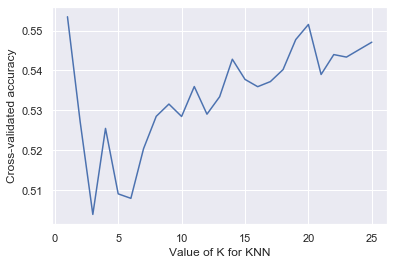

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier (n_neighbors=k)
# It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_tr, y_tr)
#Predicting the Test Set
y_pred = classifier.predict(x_te)

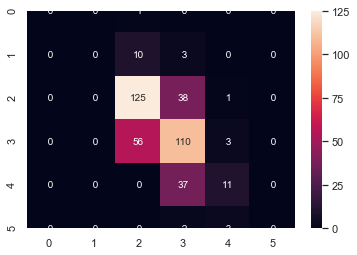

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_tr,y = y_tr, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.6184880771897516

In [ ]:
accuracies.std()

0.05811606929577046

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(x_tr, y_tr)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
best_accuracy

0.6663886572143453

In [ ]:
best_parameters

{'C': 10, 'gamma': 0.8, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 0.9)
classifier.fit(x_tr, y_tr)

#Predicting the Test Set
y_pred = classifier.predict(x_te)

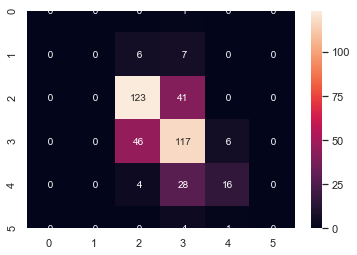

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

# TSNE

In [ ]:
scaled_data = StandardScaler().fit(df[cor_columns]).transform(df[cor_columns])
df_pca = PCA(n_components = 2).fit(scaled_data)
df_pca.explained_variance_ratio_

array([0.28173931, 0.1750827 ])

In [ ]:
df_pca = PCA(n_components = 2).fit_transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

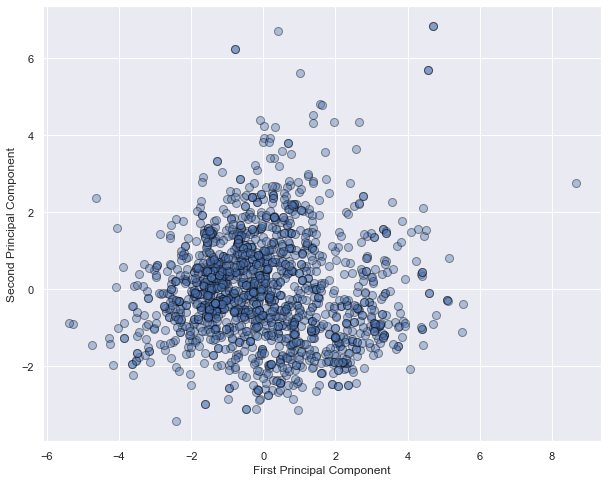

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df_pca[:,0], df_pca[:,1],  alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
from sklearn.manifold import TSNE
df_tsne = TSNE(perplexity=10).fit_transform(scaled_data)

Text(0.5, 1.0, 'Red Wine HD Projection (tSNE)')

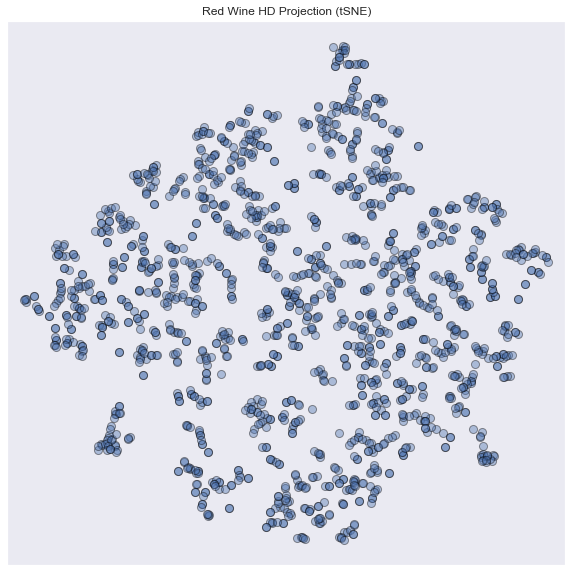

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.scatter(df_tsne[:,0], df_tsne[:,1], alpha=0.4, edgecolors='black', s=65);

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)

ax.set_title("Red Wine HD Projection (tSNE)")

In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
res1 = pd.DataFrame(data=df_tsne, columns=['tsne_x', 'tsne_y'])
res1['quality'] = df.quality
res1['pca_x'] = df_pca[:,0]
res1['pca_y'] = df_pca[:,1]

In [ ]:
colors = ['#b2182b','#ef8a62','#fddbc7','#e0e0e0','#999999','#4d4d4d']
colors = ['#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
color_map = {3:colors[0], 4:colors[1], 5:colors[2], 6:colors[3], 7:colors[4], 8:colors[5]}

Text(0.5, 1.0, 'Red Wine HD Projection TNSE')

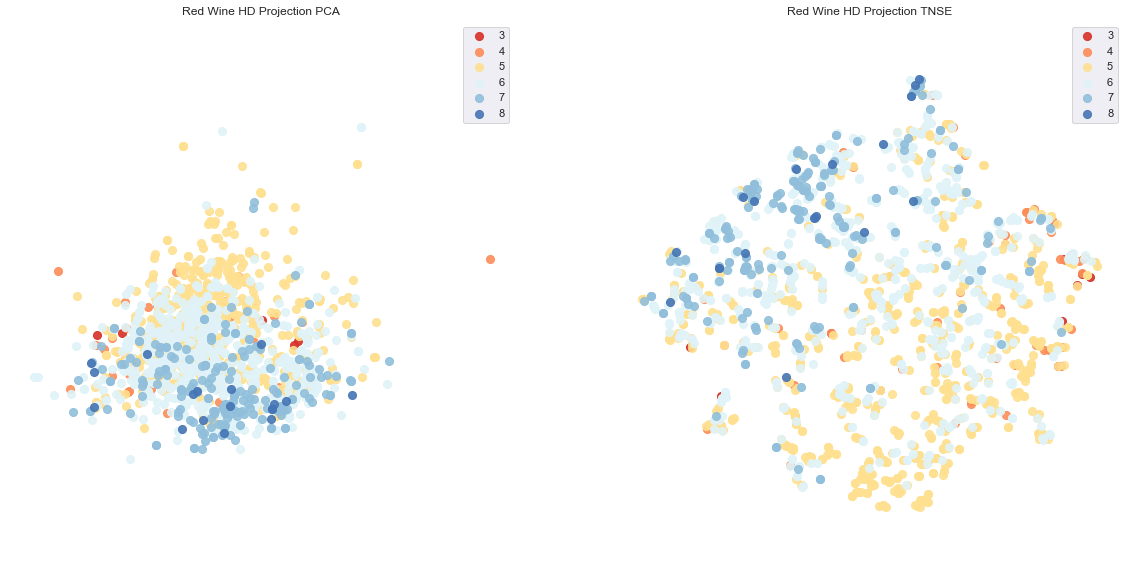

In [ ]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax.axis("equal")

for quality, tmp in res1.groupby(['quality']):
    
    ax.scatter(tmp.pca_x, tmp.pca_y, alpha=0.9, edgecolors=None, s=65, label=quality, c=color_map[quality]);


for quality, tmp in res1.groupby(['quality']):
    
    ax2.scatter(tmp.tsne_x, tmp.tsne_y, alpha=0.9, edgecolors=None, s=65, label=quality, c=color_map[quality]);

for a in [ax, ax2]: 
    a.axis("equal")
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_xticks([])
    a.set_yticks([])
    a.grid(False)
    a.legend()
    a.set_facecolor("white")
ax.set_title("Red Wine HD Projection PCA")
ax2.set_title("Red Wine HD Projection TNSE")